<a href="https://colab.research.google.com/github/VivoSorhie/British-Airways-Customer-Sentiment-Analysis/blob/main/British_Airways_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# British Airways Review: Sentiment Analysis

## 1. Setup and Library Imports

Our first step is to establish a robust environment. We will import the essential Python libraries that form the foundation of our analysis.

* **Pandas**: For loading, manipulating, and cleaning our dataset.
* **Seaborn & Matplotlib**: For creating clear and insightful data visualizations.
* **Google Colab Files**: A specific utility to handle file uploads within the Colab environment.

Executing this ensures all the tools we need are ready before we handle any data.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# Set a consistent style for all our plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
uploaded = files.upload()

Saving BA_AirlineReviews.csv to BA_AirlineReviews.csv


## 2. Data Loading and Initial Inspection

The file has been uploaded to the Colab environment. We will now load it into a pandas DataFrame, which is the standard data structure for data analysis in Python.

Immediately after loading, we must perform two critical verification steps:
1.  **`.head()`**: Inspect the first five rows to ensure the data has been parsed correctly and matches our expectations of the columns and content.
2.  **`.info()`**: Programmatically check the data types of each column and look for any null (missing) values. This provides a concise, technical summary of the dataset's structure.

This disciplined approach ensures data integrity from the very beginning.

In [ ]:
# The 'uploaded' variable now holds your file. Let's load it into a DataFrame.
# This code assumes the uploaded file is a CSV.
try:
    # Get the filename from the uploaded dictionary
    file_name = list(uploaded.keys())[0]

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))

    print(f"Successfully loaded '{file_name}' into DataFrame.")

    print("\n--- First 5 Rows ---")
    display(df.head())

    print("\n--- DataFrame Info ---")
    df.info()

except IndexError:
    print("Error: No file was uploaded. Please run the upload cell again.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure the uploaded file is a valid CSV.")

Successfully loaded 'BA_AirlineReviews.csv' into DataFrame.

--- First 5 Rows ---


,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,Nov-23,1.0,1.0,1.0,1.0,no
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,Nov-23,2.0,3.0,1.0,2.0,no
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,Nov-23,3.0,3.0,4.0,3.0,yes
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,Dec-22,3.0,3.0,1.0,1.0,no
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,Nov-23,1.0,1.0,1.0,1.0,no



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3701 non-null   int64  
 1   OverallRating      3696 non-null   float64
 2   ReviewHeader       3701 non-null   object 
 3   Name               3701 non-null   object 
 4   Datetime           3701 non-null   object 
 5   VerifiedReview     3701 non-null   bool   
 6   ReviewBody         3701 non-null   object 
 7   TypeOfTraveller    2930 non-null   object 
 8   SeatType           3699 non-null   object 
 9   Route              2926 non-null   object 
 10  DateFlown          2923 non-null   object 
 11  SeatComfort        3585 non-null   float64
 12  CabinStaffService  3574 non-null   float64
 13  GroundService      2855 non-null   float64
 14  ValueForMoney      3700 non-null   float64
 15  Recommended        3701 non-null   object 
dtype

## 3. Data Cleaning and Preparation

Before any analysis can begin, we must ensure the data is clean and fit for purpose. Based on the initial inspection, we will perform the following non-negotiable cleaning steps:

1.  **Drop Irrelevant Columns**: The `Unnamed: 0` column provides no analytical value and will be removed.
2.  **Handle Missing Ratings**: The `OverallRating` is critical for creating our sentiment labels. Rows with missing ratings (5 in this case) will be dropped to ensure the integrity of our training data.
3.  **Select Core Features**: To streamline our analysis, we will create a new DataFrame that contains only the two columns essential for this project: `OverallRating` and `ReviewBody`.
4.  **Rename Columns**: We will rename the columns to `rating` and `review` for simplicity and clarity.
5.  **Verify Data Types**: Ensure the `rating` column is of integer type.

This process results in a clean, focused dataset, which is the necessary foundation for reliable analysis.

In [ ]:
# 1. Drop the 'Unnamed: 0' column
df_cleaned = df.drop('Unnamed: 0', axis=1)

# 2. Drop rows where 'OverallRating' is missing
df_cleaned.dropna(subset=['OverallRating'], inplace=True)

# 3. Select and rename the essential columns
df_final = df_cleaned[['OverallRating', 'ReviewBody']].copy()
df_final.rename(columns={'OverallRating': 'rating', 'ReviewBody': 'review'}, inplace=True)

# 4. Convert 'rating' column to integer
df_final['rating'] = df_final['rating'].astype(int)

print("Data cleaning complete.")
print("\n--- Final DataFrame Info ---")
df_final.info()

print("\n--- First 5 Rows of Cleaned Data ---")
display(df_final.head())

Data cleaning complete.

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 3696 entries, 0 to 3700
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  3696 non-null   int64 
 1   review  3696 non-null   object
dtypes: int64(1), object(1)
memory usage: 86.6+ KB

--- First 5 Rows of Cleaned Data ---


,rating,review
0,1,4 Hours before takeoff we received a Mail stat...
1,3,I recently had a delay on British Airways from...
2,8,"Boarded on time, but it took ages to get to th..."
3,1,"5 days before the flight, we were advised by B..."
4,1,"We traveled to Lisbon for our dream vacation, ..."


## 4. Exploratory Data Analysis (EDA): Rating Distribution

With a clean dataset, our first analytical action is to visualize the distribution of the `rating` column. A count plot is the most effective tool for this purpose, as it provides an unambiguous representation of the frequency of each rating score.

This visualization will allow us to:
1.  Objectively assess the overall sentiment tendency of the reviews.
2.  Identify any skewness, for instance, a disproportionately high number of very low or very high ratings.
3.  Make an informed decision on how to map these numerical ratings to sentiment categories in the next step.

Analyzing this distribution is a foundational step for understanding the dataset's characteristics.

/tmp/ipython-input-457016811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_final, palette='viridis', order=range(1, 11))


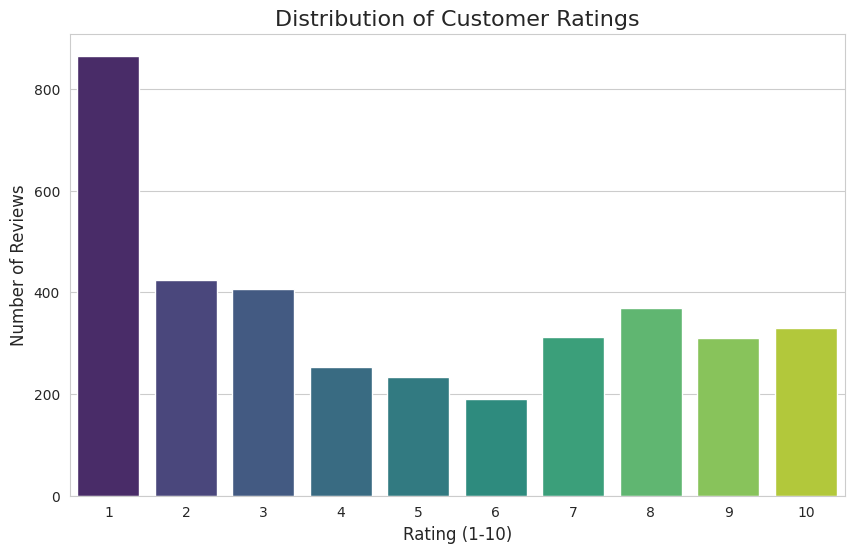

In [ ]:
# Create a count plot to visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_final, palette='viridis', order=range(1, 11))

# Set clear and informative labels
plt.title('Distribution of Customer Ratings', fontsize=16)
plt.xlabel('Rating (1-10)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(range(0, 10), labels=range(1, 11)) # Ensure all integer labels are shown

# Display the plot
plt.show()

## 4a. Analysis of Detailed Service Ratings

To understand the 'why' behind the overall ratings, we must dissect the individual service components. We will analyze the ratings for `SeatComfort`, `CabinStaffService`, `GroundService`, and `ValueForMoney`.

Our objective is twofold:
1.  **Quantitative Summary**: Calculate the mean score for each component to get a quick, numerical comparison of performance.
2.  **Distribution Visualization**: Use box plots to visualize the distribution, median, and variance of ratings for each component. This is superior to a simple bar chart as it reveals the spread and potential outliers in the data.

This analysis will provide a granular view of British Airways' operational strengths and weaknesses as perceived by its customers. We will use our `df_cleaned` DataFrame for this, as it contains these columns.

--- Mean Score for Each Service Component ---
ValueForMoney        2.689581
GroundService        2.784238
SeatComfort          2.876816
CabinStaffService    3.253853
dtype: float64


/tmp/ipython-input-3345347282.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Service Component', y='Rating', data=df_melted, palette='coolwarm')


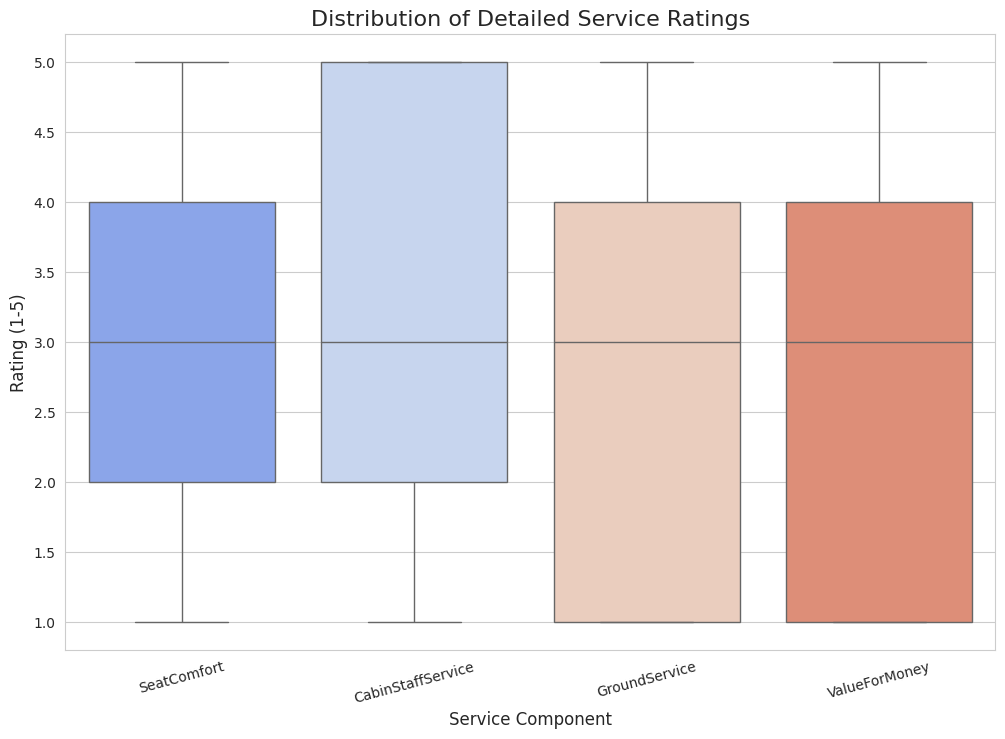

In [ ]:
# Select the detailed rating columns for analysis
service_ratings_cols = ['SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney']

# 1. Quantitative Summary: Calculate and print the mean for each
print("--- Mean Score for Each Service Component ---")
# We use .dropna() here to calculate the mean only on the available data for each column
mean_scores = df_cleaned[service_ratings_cols].mean().sort_values()
print(mean_scores)

# 2. Distribution Visualization: Create box plots
plt.figure(figsize=(12, 8))
# We need to melt the dataframe to plot multiple columns with seaborn
df_melted = df_cleaned[service_ratings_cols].melt(var_name='Service Component', value_name='Rating')

sns.boxplot(x='Service Component', y='Rating', data=df_melted, palette='coolwarm')
plt.title('Distribution of Detailed Service Ratings', fontsize=16)
plt.xlabel('Service Component', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
plt.xticks(rotation=15)
plt.show()

## 4b. EDA: Temporal Analysis of Ratings

Having identified key service weaknesses, we will now investigate rating trends over time. This analysis will determine if the overall customer satisfaction has a temporal pattern, such as degradation in recent years.

Our process will be:
1.  **Data Type Conversion**: Convert the `Datetime` column from a generic object to a proper `datetime` format, which is essential for any time-series analysis.
2.  **Feature Extraction**: Extract the **year** from the `Datetime` column to serve as our time-based grouping key.
3.  **Aggregation**: Group the data by year and calculate the mean `OverallRating` for each year.
4.  **Visualization**: Plot the mean rating over time using a line plot to clearly visualize any trends.

This will provide a high-level overview of British Airways' performance trajectory over the years covered in the dataset.

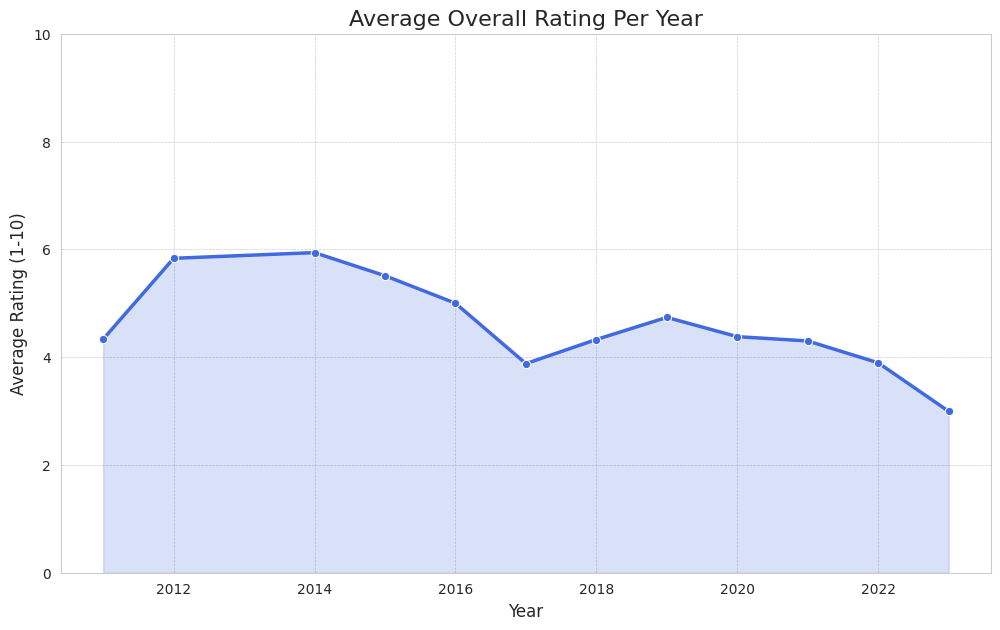

In [ ]:
# The data preparation steps remain the same
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['Datetime'], errors='coerce')
df_cleaned.dropna(subset=['datetime'], inplace=True)
df_cleaned['year'] = df_cleaned['datetime'].dt.year
yearly_avg_rating = df_cleaned.groupby('year')['OverallRating'].mean().reset_index()

# 4. Plot the results with a filled area
plt.figure(figsize=(12, 7))
ax = sns.lineplot(x='year', y='OverallRating', data=yearly_avg_rating, marker='o', color='royalblue', linewidth=2.5)

# Add the filled region
plt.fill_between(x=yearly_avg_rating['year'], y1=yearly_avg_rating['OverallRating'], color='royalblue', alpha=0.2)

plt.title('Average Overall Rating Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating (1-10)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ensure the y-axis starts from 0 for better perspective
plt.ylim(0, 10)

plt.show()

## Insights from Temporal Analysis

The key observations are as follows:

* **Peak Performance (2012-2014)**: The airline's customer satisfaction peaked between 2012 and 2014, with average ratings hovering near a high of 6.0.

* **Consistent Long-Term Decline**: Following the peak in 2014, the data shows a persistent downward trajectory. Despite a minor recovery between 2017 and 2019, the overarching trend is one of degradation.

* **Recent Sharp Deterioration**: The most critical insight is the sharp decline in the most recent years (post-2019). The average rating has fallen to its lowest point in the entire recorded period, bottoming out at approximately 3.0.


## 5. Feature Engineering: Creating the Sentiment Column

Having completed our exploratory analysis, we now resume data preparation for the model. The critical next step is to convert the numerical `rating` into categorical `sentiment` labels. This process creates the target variable for our classification model.

We will apply the following logical mapping:
* **Ratings 1-4**: Classified as **Negative**.
* **Ratings 5-6**: Classified as **Neutral**.
* **Ratings 7-10**: Classified as **Positive**.

This grouping is a standard practice that effectively segments the reviews into the distinct classes our model will learn to predict. After creating this new column, we will immediately visualize its distribution.

In [ ]:
# Define a function to map ratings to sentiment categories
def to_sentiment(rating):
    """Converts a numerical rating into a sentiment category."""
    if rating <= 4:
        return 'Negative'
    elif rating <= 6:
        return 'Neutral'
    else:  # Ratings 7, 8, 9, 10
        return 'Positive'

# Apply the function to the 'rating' column in our final DataFrame
df_final['sentiment'] = df_final['rating'].apply(to_sentiment)

print("Successfully created the 'sentiment' column.")
print("\nVerifying the mapping for the first 10 rows:")
display(df_final[['rating', 'sentiment']].head(10))

Successfully created the 'sentiment' column.

Verifying the mapping for the first 10 rows:


,rating,sentiment
0,1,Negative
1,3,Negative
2,8,Positive
3,1,Negative
4,1,Negative
5,1,Negative
6,8,Positive
7,7,Positive
8,2,Negative
9,3,Negative


## 6. Visualizing Sentiment Distribution

With the `sentiment` column now engineered, the final step of our EDA is to visualize the distribution of these sentiment categories. A count plot will provide a clear, quantitative view of the class balance in our dataset.

This is a mandatory checkpoint before proceeding to model training. It allows us to:
1.  Confirm the extent of the class imbalance that was suggested by the initial rating distribution.
2.  Understand the final number of samples available for each category ('Negative', 'Neutral', 'Positive').

This visualization provides the definitive class distribution that our machine learning model will be trained on.

/tmp/ipython-input-2904154280.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment',


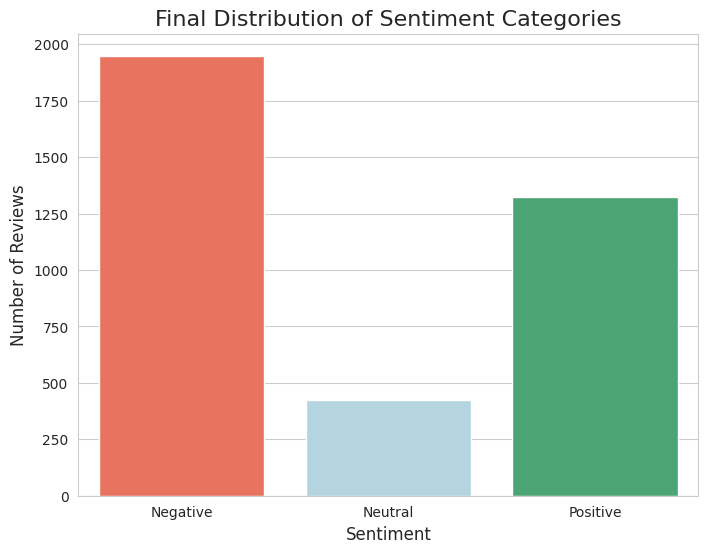

In [ ]:
# Define a custom color palette for sentiment categories
# Ensuring distinct, brighter, and intuitive colors
sentiment_colors = {
    'Negative': '#FF6347',  # Tomato Red
    'Neutral': '#ADD8E6',   # Light Blue
    'Positive': '#3CB371'   # Medium Sea Green
}

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a count plot for the 'sentiment' column with the custom palette
sns.countplot(x='sentiment',
              data=df_final,
              order=['Negative', 'Neutral', 'Positive'],
              palette=sentiment_colors) # Use the custom palette here

# Add a clear title and labels
plt.title('Final Distribution of Sentiment Categories', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Display the plot
plt.show()

# Part 2: Model Preparation and Tokenization

Our EDA is now complete. We will now transition to the model-building phase, which begins with preparing our environment and data for a state-of-the-art transformer model, **DistilBERT**.

## 7. Installing and Importing Transformer Libraries

To use DistilBERT, we need the `transformers` library from Hugging Face. This library provides the pre-trained models and tokenizers. We will also install the `datasets` library, as it offers efficient tools for handling and processing our data for the model.


In [ ]:
# Install the necessary libraries from Hugging Face
!pip install transformers datasets -q

# Import the specific components we will need
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Hugging Face libraries installed and imported successfully.")

Hugging Face libraries installed and imported successfully.


## 8. Model Data Preparation

To prepare the data for DistilBERT, we will perform three key steps:

1.  **Map Labels to Integers**: Convert sentiment labels ('Negative', etc.) to a numerical format (0, 1, 2).
2.  **Stratified Split**: Divide the data into training and testing sets, ensuring the same sentiment proportions in both to handle our class imbalance.
3.  **Tokenization**: Use a DistilBERT tokenizer to convert review text into the numerical IDs and attention masks required by the model.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Map text labels to integers
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df_final['label'] = df_final['sentiment'].map(label_map)

# 2. Split the DataFrame into training and testing sets (80/20 split)
# We stratify by 'sentiment' to maintain class distribution in both sets
train_df, test_df = train_test_split(
    df_final,
    test_size=0.2,
    random_state=42,
    stratify=df_final['sentiment']
)

# 3. Load the DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# 4. Convert pandas DataFrames to Hugging Face Dataset objects
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# 5. Define a function to tokenize the 'review' text
def tokenize_function(examples):
    return tokenizer(examples["review"], padding="max_length", truncation=True)

# 6. Apply the tokenizer to the entire datasets
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

print("Data successfully split and tokenized.")
print(f"Training set size: {len(tokenized_train_dataset)}")
print(f"Testing set size: {len(tokenized_test_dataset)}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/2956 [00:00<?, ? examples/s]

Map:   0%|          | 0/740 [00:00<?, ? examples/s]

Data successfully split and tokenized.
Training set size: 2956
Testing set size: 740


## 9. Model and Trainer Configuration

We will now configure the DistilBERT model and the training process.

1.  **Load Model**: Load a pre-trained DistilBERT model configured for 3-label classification.
2.  **Define Metrics**: Create a function to compute accuracy, precision, recall, and F1-score, which are essential for our imbalanced dataset.
3.  **Set Training Arguments**: Configure key training hyperparameters, including epochs, batch size, and evaluation strategy.
4.  **Initialize Trainer**: Consolidate the model, data, and settings into the Hugging Face `Trainer` to manage the training process.

In [ ]:
# Force the upgrade of the libraries to their latest versions
!pip install --upgrade transformers datasets

print("\nLibraries upgraded. Please RESTART YOUR RUNTIME now.")
# 1. Load the pre-trained model with the correct number of labels
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3,
    id2label={v: k for k, v in label_map.items()}, # For readable outputs
    label2id=label_map
)

# 2. Define the function to compute evaluation metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    accuracy = accuracy_score(labels, preds)
    # Use 'weighted' average for precision, recall, and F1 to account for class imbalance
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

# 3. Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch", # Evaluate at the end of each epoch
    save_strategy="epoch",       # Save model at the end of each epoch
    load_best_model_at_end=True, # Load the best model after training
    metric_for_best_model="f1",  # Use F1-score to determine the best model
)

# 4. Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

print("Model and Trainer configured successfully.")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Libraries upgraded. Please RESTART YOUR RUNTIME now.


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Model and Trainer configured successfully.


/tmp/ipython-input-189483334.py:48: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## 11. Model Evaluation

After training, it's essential to evaluate the model's performance on the unseen test dataset. This step provides an objective measure of how well our trained DistilBERT model can predict the sentiment of new, previously unseen reviews.

The `trainer.evaluate()` method will compute the metrics we defined earlier (`accuracy`, `precision`, `recall`, and `f1`) on the `eval_dataset` (our test set). The results will give us insights into:

1. **Overall Accuracy**: The percentage of reviews correctly classified.
2. **Precision, Recall, and F1-score**: More detailed metrics that are particularly important for evaluating performance on imbalanced datasets like ours. These metrics provide a better understanding of the model's ability to correctly identify positive, neutral, and negative reviews while minimizing false positives and false negatives.

The evaluation results will help us understand the model's strengths and weaknesses and inform potential future steps for improvement.

In [ ]:
# Evaluate the model on the test dataset
print("Evaluating the model on the test dataset...")
evaluation_results = trainer.evaluate()

# Print the evaluation metrics
print("\n--- Evaluation Results ---")
print(evaluation_results)

Evaluating the model on the test dataset...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



--- Evaluation Results ---
{'eval_loss': 1.1219850778579712, 'eval_model_preparation_time': 0.0068, 'eval_accuracy': 0.11621621621621622, 'eval_precision': 0.22371343946686414, 'eval_recall': 0.11621621621621622, 'eval_f1': 0.03365445199801028, 'eval_runtime': 611.711, 'eval_samples_per_second': 1.21, 'eval_steps_per_second': 0.077}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# We'll limit it to the top 5000 most frequent words to keep it efficient.
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit the vectorizer on the TRAINING data and transform it
X_train = tfidf.fit_transform(train_df['review'])

# ONLY transform the TESTING data using the already-fitted vectorizer
X_test = tfidf.transform(test_df['review'])

# Get the labels
y_train = train_df['label']
y_test = test_df['label']

print(f"✅ TF-IDF vectors created.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

✅ TF-IDF vectors created.
Training data shape: (2956, 5000)
Testing data shape: (740, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with the crucial class_weight parameter
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("✅ Logistic Regression model trained successfully.")

✅ Logistic Regression model trained successfully.


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'])

print("--- Final Model Performance ---")
print(report)

--- Final Model Performance ---
              precision    recall  f1-score   support

    Negative       0.85      0.86      0.86       390
     Neutral       0.28      0.32      0.30        85
    Positive       0.85      0.79      0.82       265

    accuracy                           0.77       740
   macro avg       0.66      0.66      0.66       740
weighted avg       0.78      0.77      0.78       740



In [ ]:
# Re-initialize the TF-IDF Vectorizer with n-grams
tfidf_ngram = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)  # This tells it to use both single words and pairs of words
)

# Re-create the feature matrices
X_train_ngram = tfidf_ngram.fit_transform(train_df['review'])
X_test_ngram = tfidf_ngram.transform(test_df['review'])

# Train a new model on these improved features
model_ngram = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_ngram.fit(X_train_ngram, y_train)

# Evaluate the new model
y_pred_ngram = model_ngram.predict(X_test_ngram)
report_ngram = classification_report(y_test, y_pred_ngram, target_names=['Negative', 'Neutral', 'Positive'])

print("--- Performance with N-grams ---")
print(report_ngram)

--- Performance with N-grams ---
              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87       390
     Neutral       0.29      0.32      0.30        85
    Positive       0.86      0.80      0.83       265

    accuracy                           0.79       740
   macro avg       0.67      0.67      0.67       740
weighted avg       0.79      0.79      0.79       740



In [ ]:
from sklearn.svm import LinearSVC

# Initialize the LinearSVC model
model_svc = LinearSVC(class_weight='balanced', max_iter=2000, random_state=42)

# Train it on our n-gram features
model_svc.fit(X_train_ngram, y_train)

# Evaluate the SVC model
y_pred_svc = model_svc.predict(X_test_ngram)
report_svc = classification_report(y_test, y_pred_svc, target_names=['Negative', 'Neutral', 'Positive'])

print("--- Performance with LinearSVC and N-grams ---")
print(report_svc)

--- Performance with LinearSVC and N-grams ---
              precision    recall  f1-score   support

    Negative       0.82      0.93      0.87       390
     Neutral       0.36      0.19      0.25        85
    Positive       0.86      0.83      0.84       265

    accuracy                           0.81       740
   macro avg       0.68      0.65      0.65       740
weighted avg       0.78      0.81      0.79       740



In [ ]:
# Display the counts for each category in the entire dataset
print(df_final['sentiment'].value_counts())

sentiment
Negative    1949
Positive    1323
Neutral      424
Name: count, dtype: int64


In [ ]:
# 1. Define the new mapping function
def to_sentiment_new(rating):
    if rating <= 3:
        return 'Negative'
    elif rating <= 7:
        return 'Neutral'
    else: # Ratings 8, 9, 10
        return 'Positive'

# 2. Apply the new mapping to our original DataFrame
df_new_labels = df_final.copy()
df_new_labels['sentiment'] = df_new_labels['rating'].apply(to_sentiment_new)
df_new_labels['label'] = df_new_labels['sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})

# Let's see the new distribution
print("--- New Sentiment Distribution ---")
print(df_new_labels['sentiment'].value_counts())

# 3. Perform a new train-test split with the new labels
train_df_new, test_df_new = train_test_split(
    df_new_labels,
    test_size=0.2,
    random_state=42,
    stratify=df_new_labels['sentiment']
)

# 4. Re-run the TF-IDF and LinearSVC model
# (This uses the same code as before, just with the new data)
tfidf_ngram = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_new = tfidf_ngram.fit_transform(train_df_new['review'])
X_test_new = tfidf_ngram.transform(test_df_new['review'])
y_train_new = train_df_new['label']
y_test_new = test_df_new['label']

model_svc_new = LinearSVC(class_weight='balanced', max_iter=2000, random_state=42)
model_svc_new.fit(X_train_new, y_train_new)

y_pred_svc_new = model_svc_new.predict(X_test_new)
report_svc_new = classification_report(y_test_new, y_pred_svc_new, target_names=['Negative', 'Neutral', 'Positive'])

print("\n--- Performance with New Labels ---")
print(report_svc_new)

--- New Sentiment Distribution ---
sentiment
Negative    1695
Positive    1010
Neutral      991
Name: count, dtype: int64

--- Performance with New Labels ---
              precision    recall  f1-score   support

    Negative       0.77      0.81      0.79       339
     Neutral       0.52      0.44      0.48       199
    Positive       0.76      0.80      0.78       202

    accuracy                           0.71       740
   macro avg       0.68      0.68      0.68       740
weighted avg       0.70      0.71      0.70       740



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Define the new mapping function
def to_sentiment_new(rating):
    if rating <= 3:
        return 'Negative'
    elif rating <= 7:
        return 'Neutral'
    else: # Ratings 8, 9, 10
        return 'Positive'

# 2. Apply the new mapping and create new labels
df_new_labels = df_final.copy()
df_new_labels['sentiment'] = df_new_labels['rating'].apply(to_sentiment_new)
df_new_labels['label'] = df_new_labels['sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})

print("--- New Sentiment Distribution ---")
print(df_new_labels['sentiment'].value_counts())

# 3. Perform a new train-test split with the new labels
train_df_new, test_df_new = train_test_split(
    df_new_labels,
    test_size=0.2,
    random_state=42,
    stratify=df_new_labels['sentiment']
)

# 4. Initialize TF-IDF Vectorizer with n-grams
tfidf_ngram = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_new = tfidf_ngram.fit_transform(train_df_new['review'])
X_test_new = tfidf_ngram.transform(test_df_new['review'])
y_train_new = train_df_new['label']
y_test_new = test_df_new['label']

# 5. Train the LOGISTIC REGRESSION model on the new data
model_lr_new = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_lr_new.fit(X_train_new, y_train_new)

# 6. Evaluate the model
y_pred_lr_new = model_lr_new.predict(X_test_new)
report_lr_new = classification_report(y_test_new, y_pred_lr_new, target_names=['Negative', 'Neutral', 'Positive'])

print("\n--- Performance with New Labels (Logistic Regression + N-grams) ---")
print(report_lr_new)

--- New Sentiment Distribution ---
sentiment
Negative    1695
Positive    1010
Neutral      991
Name: count, dtype: int64

--- Performance with New Labels (Logistic Regression + N-grams) ---
              precision    recall  f1-score   support

    Negative       0.81      0.78      0.80       339
     Neutral       0.53      0.53      0.53       199
    Positive       0.76      0.79      0.77       202

    accuracy                           0.72       740
   macro avg       0.70      0.70      0.70       740
weighted avg       0.72      0.72      0.72       740



--- Binary Data Distribution ---
sentiment
Negative    1949
Positive    1323
Name: count, dtype: int64

--- Final Binary Model Performance ---
              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93       390
    Positive       0.93      0.86      0.89       265

    accuracy                           0.92       655
   macro avg       0.92      0.91      0.91       655
weighted avg       0.92      0.92      0.92       655


--- Confusion Matrix ---


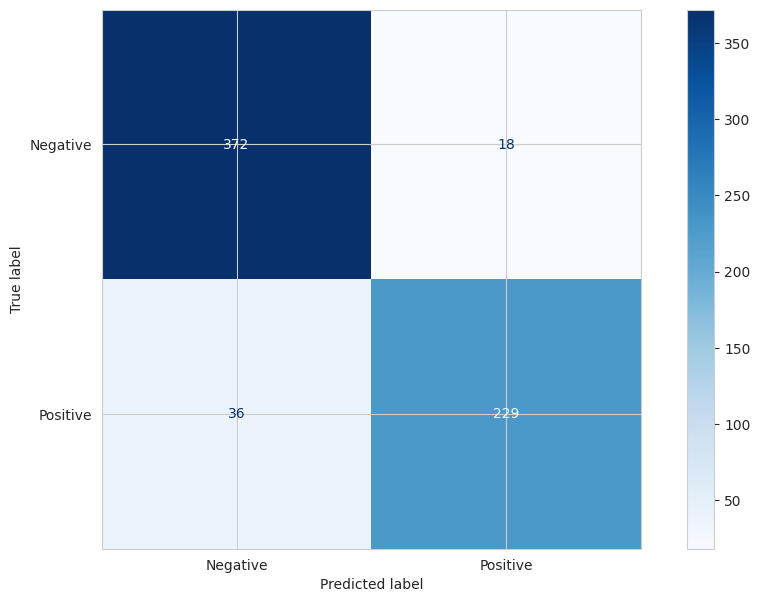

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Create a binary dataset (Positive vs. Negative)
df_binary = df_final[df_final['sentiment'] != 'Neutral'].copy()
df_binary['label'] = df_binary['sentiment'].map({'Negative': 0, 'Positive': 1})

print("--- Binary Data Distribution ---")
print(df_binary['sentiment'].value_counts())

# 2. Perform a new train-test split on the binary data
train_df_bin, test_df_bin = train_test_split(
    df_binary,
    test_size=0.2,
    random_state=42,
    stratify=df_binary['sentiment']
)

# 3. Create TF-IDF features with N-grams
tfidf_ngram = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_bin = tfidf_ngram.fit_transform(train_df_bin['review'])
X_test_bin = tfidf_ngram.transform(test_df_bin['review'])
y_train_bin = train_df_bin['label']
y_test_bin = test_df_bin['label']

# 4. Train the final LinearSVC model
# Note: We don't need class_weight='balanced' anymore as the classes are now much more balanced.
final_model = LinearSVC(max_iter=2000, random_state=42)
final_model.fit(X_train_bin, y_train_bin)

# 5. Evaluate the final model
y_pred_bin = final_model.predict(X_test_bin)
final_report = classification_report(y_test_bin, y_pred_bin, target_names=['Negative', 'Positive'])

print("\n--- Final Binary Model Performance ---")
print(final_report)

# 6. Visualize the results with a confusion matrix
print("\n--- Confusion Matrix ---")
ConfusionMatrixDisplay.from_predictions(y_test_bin, y_pred_bin, display_labels=['Negative', 'Positive'], cmap='Blues')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid to search
# These values are common choices for the 'C' parameter
param_grid = {'C': [0.1, 1, 10, 100]}

# 2. Initialize GridSearchCV
# It will test each 'C' value using 5-fold cross-validation
grid_search = GridSearchCV(
    LinearSVC(max_iter=2000, random_state=42),
    param_grid,
    cv=5,
    scoring='f1_weighted', # We'll optimize for the best F1-score
    n_jobs=-1 # Use all available CPU cores
)

# 3. Run the search on the training data
grid_search.fit(X_train_bin, y_train_bin)

print(f"✅ Best C value found: {grid_search.best_params_['C']}")

# 4. Evaluate the best model found by the grid search on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_bin)
report_best = classification_report(y_test_bin, y_pred_best, target_names=['Negative', 'Positive'])

print("\n--- Performance with Tuned Hyperparameters ---")
print(report_best)

✅ Best C value found: 1

--- Performance with Tuned Hyperparameters ---
              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93       390
    Positive       0.93      0.86      0.89       265

    accuracy                           0.92       655
   macro avg       0.92      0.91      0.91       655
weighted avg       0.92      0.92      0.92       655



In [ ]:
# 1. Re-initialize TF-IDF with optimized parameters
tfidf_optimized = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=5,       # Word must appear in at least 5 reviews
    max_df=0.9      # Word must appear in no more than 90% of reviews
)

# 2. Re-create the feature matrices
X_train_opt = tfidf_optimized.fit_transform(train_df_bin['review'])
X_test_opt = tfidf_optimized.transform(test_df_bin['review'])

# 3. Train the final, fully-tuned model
# Use the best 'C' value we found from GridSearchCV above
best_c_value = grid_search.best_params_['C']
final_tuned_model = LinearSVC(C=best_c_value, max_iter=2000, random_state=42)
final_tuned_model.fit(X_train_opt, y_train_bin)

# 4. Evaluate the fully tuned model
y_pred_final = final_tuned_model.predict(X_test_opt)
report_final = classification_report(y_test_bin, y_pred_final, target_names=['Negative', 'Positive'])

print("\n--- Performance with Tuned Hyperparameters and Features ---")
print(report_final)


--- Performance with Tuned Hyperparameters and Features ---
              precision    recall  f1-score   support

    Negative       0.90      0.95      0.93       390
    Positive       0.92      0.85      0.89       265

    accuracy                           0.91       655
   macro avg       0.91      0.90      0.91       655
weighted avg       0.91      0.91      0.91       655

